# Support Vector MAchine(SVM) to classify images of cats and dogs

In [23]:
#Importing libraries
import os
import zipfile
import cv2
import numpy as np
import random
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns

# paths

In [24]:
ZIP_PATH = r"C:\Users\ANKITA DAS\Documents\Codes\ML\skillcraft\SCT_ML_3\train.zip"
EXTRACT_DIR = r"C:\Users\ANKITA DAS\Documents\Codes\ML\skillcraft\SCT_ML_3\train"

# Extracting dataset 

In [25]:
if not os.path.exists(EXTRACT_DIR):
    with zipfile.ZipFile(ZIP_PATH, 'r') as zip_ref:
        zip_ref.extractall(EXTRACT_DIR)
    print("Extraction done.")
else:
    print("Train folder already exists.")

Train folder already exists.


#  Detecting all image files

In [26]:
image_files = []
for root, dirs, files in os.walk(EXTRACT_DIR):
    for f in files:
        if f.lower().endswith(('.jpg', '.jpeg', '.png')):
            image_files.append(os.path.join(root, f))
print(f"Total images found: {len(image_files)}")
if len(image_files) == 0:
    raise FileNotFoundError("No image files found in the extracted folder.")

Total images found: 25000


# Separating cat and dog images

In [27]:
cat_images = [f for f in image_files if 'cat' in os.path.basename(f).lower()]
dog_images = [f for f in image_files if 'dog' in os.path.basename(f).lower()]

print(f"Found {len(cat_images)} cat images and {len(dog_images)} dog images")

Found 12500 cat images and 12500 dog images


# Balanced subsampling

In [28]:
n_samples = 500 
cat_images = random.sample(cat_images, min(len(cat_images), n_samples))
dog_images = random.sample(dog_images, min(len(dog_images), n_samples))

#  Loading images and labels

In [29]:
images = []
labels = []
for img_path in cat_images:
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    if img is not None:
        img = cv2.resize(img, (64, 64))
        images.append(img.flatten())
        labels.append(0)  
for img_path in dog_images:
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    if img is not None:
        img = cv2.resize(img, (64, 64))
        images.append(img.flatten())
        labels.append(1)  
images = np.array(images, dtype=np.float32) / 255.0  
labels = np.array(labels)
print("Subset Images loaded:", images.shape)
print("Subset Labels loaded:", labels.shape)

Subset Images loaded: (1000, 4096)
Subset Labels loaded: (1000,)


# Data Visualization

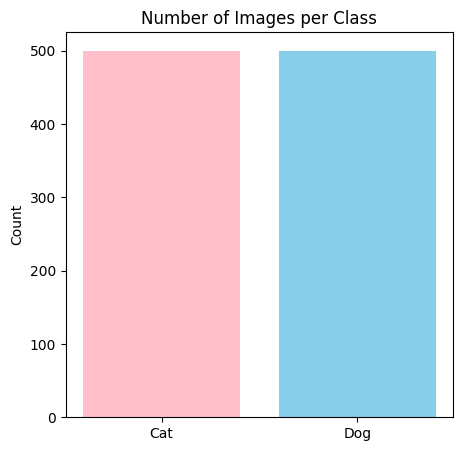

In [30]:
labels_count = [np.sum(labels==0), np.sum(labels==1)]
class_names = ['Cat', 'Dog']
plt.figure(figsize=(5,5))
plt.bar(class_names, labels_count, color=['pink', 'skyblue'])
plt.title('Number of Images per Class')
plt.ylabel('Count')
plt.show()

# Sample images

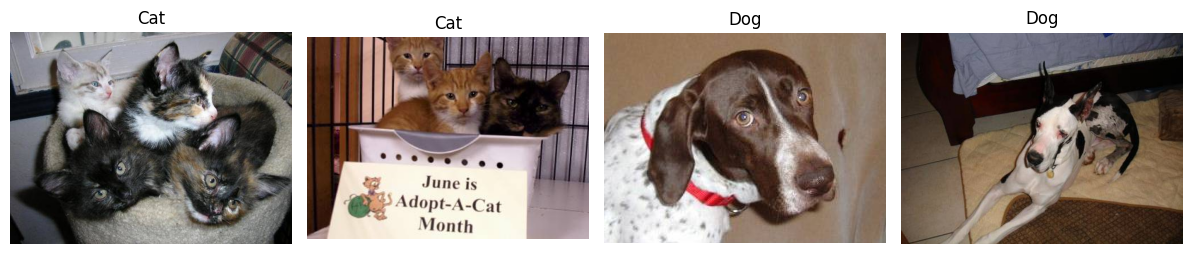

In [31]:
sample_cat = random.sample(cat_images, min(2, len(cat_images)))
sample_dog = random.sample(dog_images, min(2, len(dog_images)))
sample_images = sample_cat + sample_dog
plt.figure(figsize=(15, 5))
for i, img_path in enumerate(sample_images):
    img = cv2.imread(img_path)  
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  
    label = 'Cat' if 'cat' in os.path.basename(img_path).lower() else 'Dog'
    plt.subplot(2, 5, i+1)
    plt.imshow(img)
    plt.title(label)
    plt.axis('off')
plt.tight_layout()
plt.show()

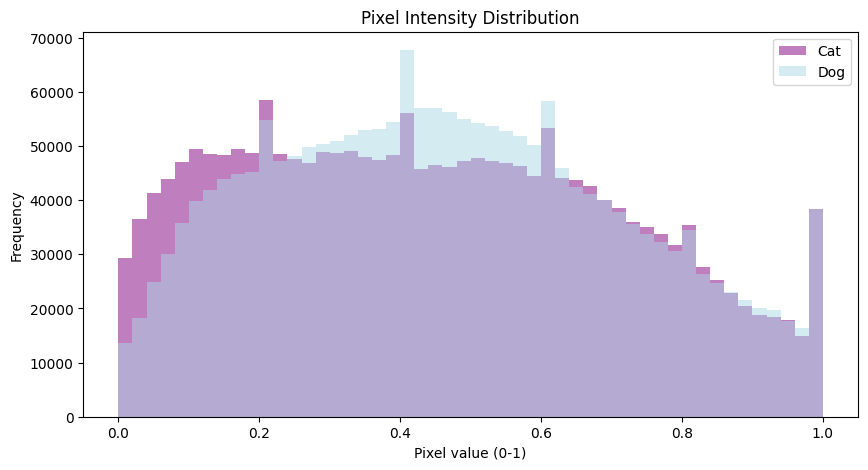

In [32]:
# Pixel intensity histogram
cat_pixels = images[labels==0].flatten()
dog_pixels = images[labels==1].flatten()
plt.figure(figsize=(10,5))
plt.hist(cat_pixels, bins=50, alpha=0.5, label='Cat', color='purple')
plt.hist(dog_pixels, bins=50, alpha=0.5, label='Dog', color='lightblue')
plt.title('Pixel Intensity Distribution')
plt.xlabel('Pixel value (0-1)')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Train-Test Split

In [33]:
X_train, X_test, y_train, y_test = train_test_split(
    images, labels, test_size=0.2, random_state=42, stratify=labels
)

# Training the SVM model

In [34]:
svm = SVC(kernel='linear', C=1.0)
svm.fit(X_train, y_train)

SVC(kernel='linear')

# Evaluating the model

In [35]:
y_pred = svm.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {acc*100:.2f}%")

Test Accuracy: 53.50%


# Confusion Matrix

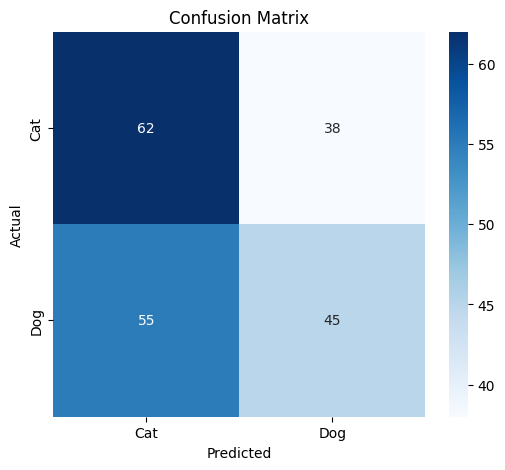

In [36]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Classification Report

In [37]:
report = classification_report(y_test, y_pred, target_names=class_names)
print("Classification Report:\n")
print(report)

Classification Report:

              precision    recall  f1-score   support

         Cat       0.53      0.62      0.57       100
         Dog       0.54      0.45      0.49       100

    accuracy                           0.54       200
   macro avg       0.54      0.54      0.53       200
weighted avg       0.54      0.54      0.53       200



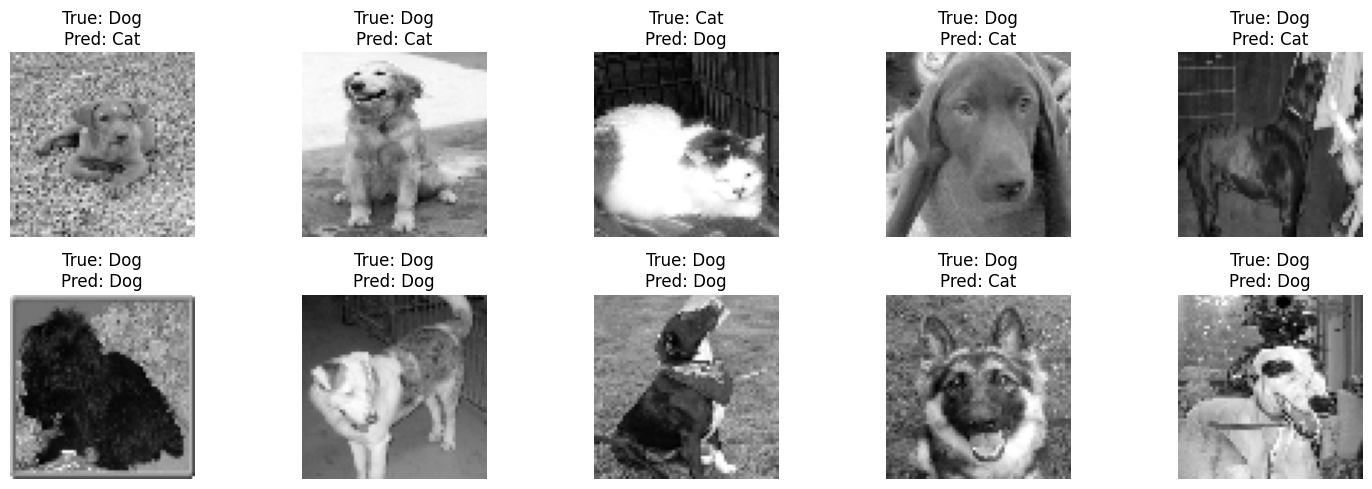

In [38]:
indices = np.random.choice(len(X_test), size=10, replace=False)
plt.figure(figsize=(15, 5))
for i, idx in enumerate(indices):
    img = X_test[idx].reshape(64, 64)
    true_label = 'Cat' if y_test[idx] == 0 else 'Dog'
    pred_label = 'Cat' if y_pred[idx] == 0 else 'Dog'
    
    plt.subplot(2, 5, i+1)
    plt.imshow(img, cmap='gray')
    plt.title(f'True: {true_label}\nPred: {pred_label}')
    plt.axis('off')

plt.tight_layout()
plt.show()